In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge , Lasso , ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.metrics import mean_squared_error

In [2]:
data=pd.read_csv("../input/gold-price-data/gld_price_data.csv")

In [3]:
data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [4]:
dt=data.drop("Date" , axis=1)
dt.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      2290 non-null   float64
 1   GLD      2290 non-null   float64
 2   USO      2290 non-null   float64
 3   SLV      2290 non-null   float64
 4   EUR/USD  2290 non-null   float64
dtypes: float64(5)
memory usage: 89.6 KB


In [6]:
data.isnull().sum() # There is not a missing data in dataset. :)

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
data.shape

(2290, 6)

In [8]:
dscs = data.describe().T
variances=pd.DataFrame(data.var()).rename(columns={0: "variance"})
skewness=pd.DataFrame(data.skew()).rename(columns={0: "skewness"})
kurtosiss=pd.DataFrame(data.kurtosis()).rename(columns={0: "kurtosis"})
descriptive_statistics=pd.concat([dscs,variances,skewness,kurtosiss], axis=1)
descriptive_statistics

,count,mean,std,min,25%,50%,75%,max,variance,skewness,kurtosis
SPX,2290.0,1654.315776,519.111540,676.530029,1239.874969,1551.434998,2073.010070,2872.870117,269476.791172,0.300362,-0.950622
GLD,2290.0,122.732875,23.283346,70.000000,109.725000,120.580002,132.840004,184.589996,542.114189,0.334138,-0.275081
USO,2290.0,31.842221,19.523517,7.960000,14.380000,33.869999,37.827501,117.480003,381.167717,1.699331,4.229726
SLV,2290.0,20.084997,7.092566,8.850000,15.570000,17.268500,22.882499,47.259998,50.304498,1.153641,0.470147
EUR/USD,2290.0,1.283653,0.131547,1.039047,1.171313,1.303297,1.369971,1.598798,0.017305,-0.005292,-0.742751


In [9]:
data.cov()

,SPX,GLD,USO,SLV,EUR/USD
SPX,269476.791172,596.416410,-5995.519132,-1009.023769,-45.890510
GLD,596.416410,542.114189,-84.714259,143.114441,-0.074659
USO,-5995.519132,-84.714259,381.167717,23.200551,2.129906
SLV,-1009.023769,143.114441,23.200551,50.304498,0.300084
EUR/USD,-45.890510,-0.074659,2.129906,0.300084,0.017305


In [10]:
data.corr()

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<AxesSubplot:>

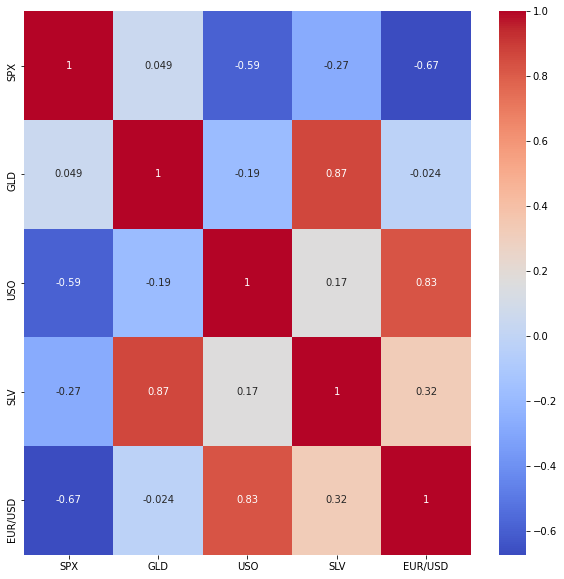

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr() , annot=True , cmap="coolwarm")

In [12]:
data.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

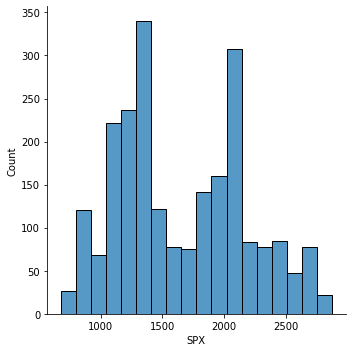

In [13]:
sns.displot(x='SPX' , data=data )

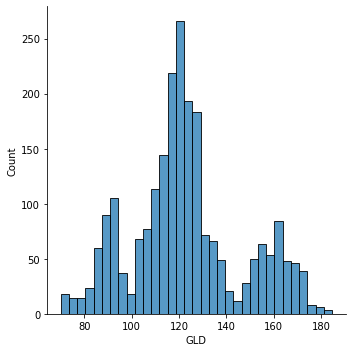

In [14]:
sns.displot(x='GLD' , data=data )

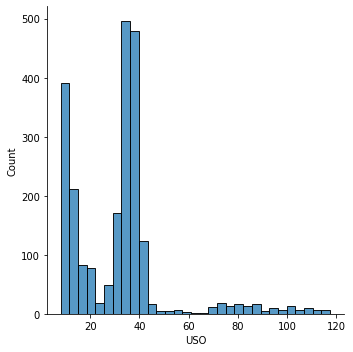

In [15]:
sns.displot(x='USO' , data=data )

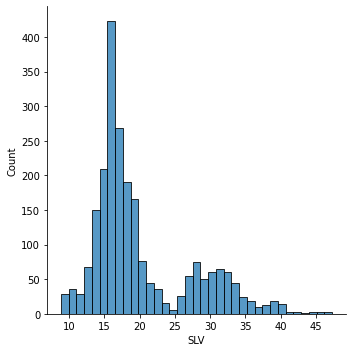

In [16]:
sns.displot(x='SLV' , data=data )

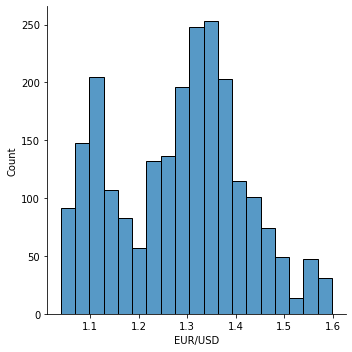

In [17]:
sns.displot(x='EUR/USD' , data=data )

<AxesSubplot:xlabel='SPX', ylabel='Density'>

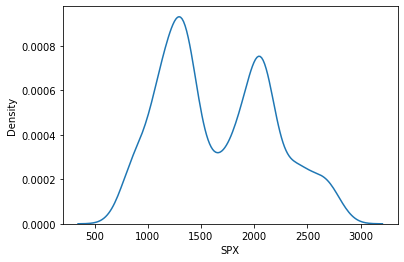

In [18]:
sns.kdeplot(data=data , x=data.SPX)

<AxesSubplot:xlabel='GLD', ylabel='Density'>

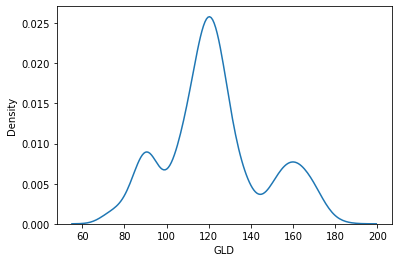

In [19]:
sns.kdeplot(data=data , x=data.GLD)

<AxesSubplot:xlabel='USO', ylabel='Density'>

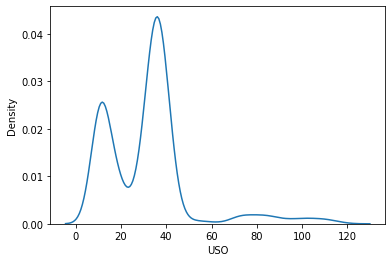

In [20]:
sns.kdeplot(data=data , x=data.USO)

<AxesSubplot:xlabel='SLV', ylabel='Density'>

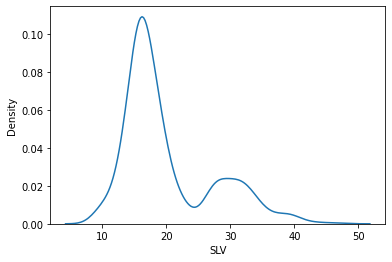

In [21]:
sns.kdeplot(data=data , x=data.SLV)

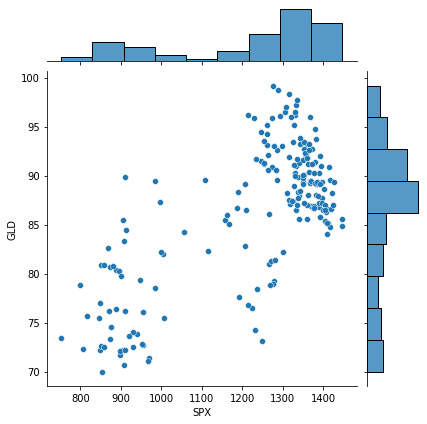

In [22]:
sns.jointplot(data=data.head(200) , x=data.head(200).SPX , y=data.head(200).GLD)

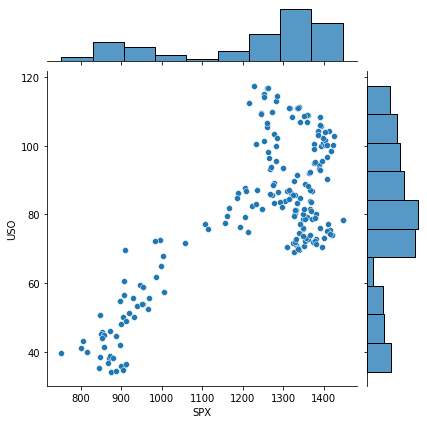

In [23]:
sns.jointplot(data=data.head(200) , x=data.head(200).SPX , y=data.head(200).USO)

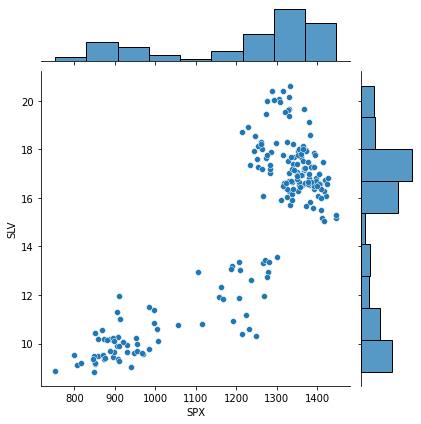

In [24]:
sns.jointplot(data=data.head(200) , x=data.head(200).SPX , y=data.head(200).SLV)

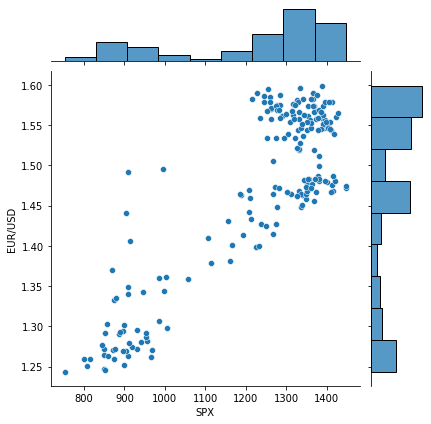

In [25]:
sns.jointplot(data=data.head(200) , x=data.head(200).SPX , y=data.head(200)["EUR/USD"])

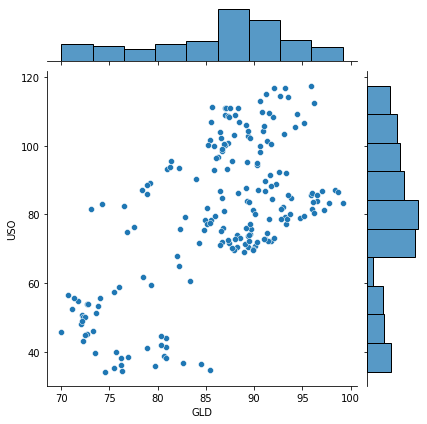

In [26]:
sns.jointplot(data=data.head(200) , x=data.head(200).GLD , y=data.head(200).USO)

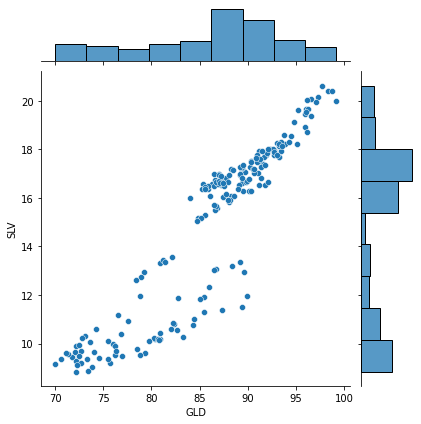

In [27]:
sns.jointplot(data=data.head(200) , x=data.head(200).GLD , y=data.head(200).SLV)

<AxesSubplot:xlabel='USO', ylabel='SPX'>

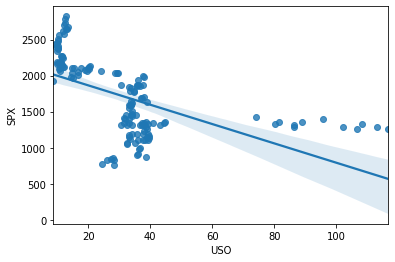

In [28]:
sns.regplot(x=data.sample(150 , random_state=1).USO , y=data.sample(150 , random_state=1).SPX , data=data)

<AxesSubplot:xlabel='EUR/USD', ylabel='USO'>

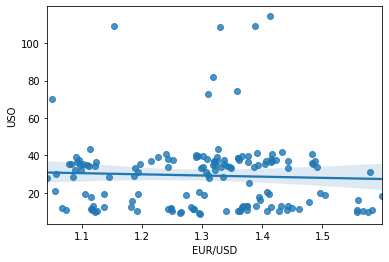

In [29]:
sns.regplot(x=data.sample(150)["EUR/USD"] , y=data.sample(150).USO , data=data)

<AxesSubplot:xlabel='EUR/USD', ylabel='SPX'>

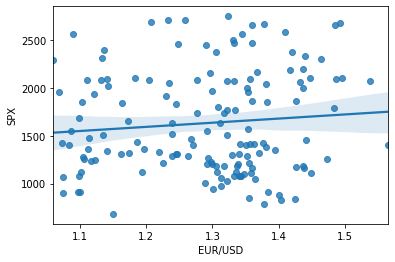

In [30]:
sns.regplot(x=data.sample(150)["EUR/USD"] , y=data.sample(150).SPX , data=data)

<AxesSubplot:xlabel='GLD', ylabel='SLV'>

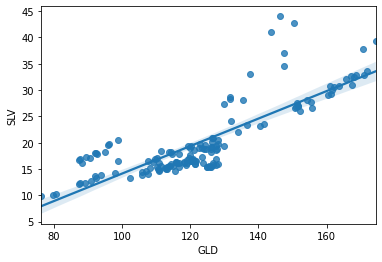

In [31]:
sns.regplot(x=data.sample(150 , random_state=1).GLD , y=data.sample(150 , random_state=1).SLV , data=data)

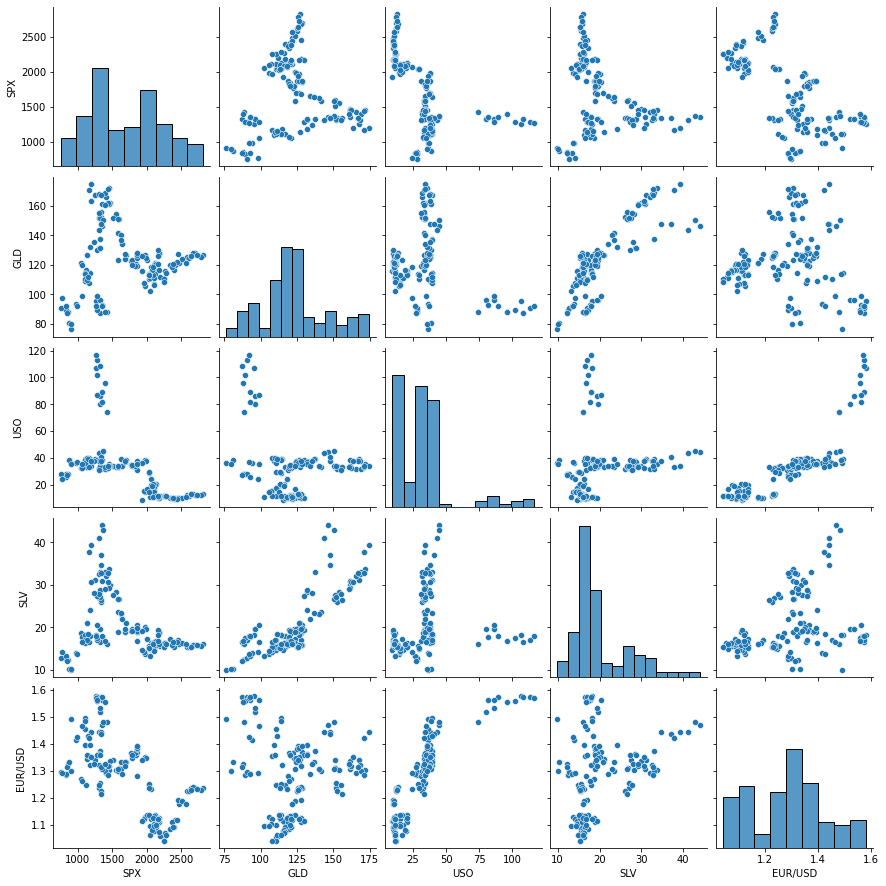

In [32]:
sns.pairplot(data.sample(150 , random_state=1))

In [33]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=5)
clf

LocalOutlierFactor(n_neighbors=5)

In [34]:
pred = clf.fit_predict(dt)

In [35]:
dt[pred == -1 ]  # outlier data

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
86,1426.630005,89.389999,102.800003,16.819,1.565411
147,1106.420044,89.570000,77.089996,12.950,1.409642
150,1114.280029,82.330002,75.820000,10.800,1.378493
...,...,...,...,...,...
2148,2537.739990,121.169998,10.080000,15.690,1.175724
2220,2872.870117,128.070007,13.240000,16.410,1.239234
2225,2762.129883,126.389999,13.040000,15.660,1.251001
2248,2738.969971,125.419998,12.150000,15.550,1.241465


In [36]:
df = dt[pred == 1 ]
df.head()       # non-outlier data

,SPX,GLD,USO,SLV,EUR/USD
2,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1420.329956,88.250000,74.019997,16.061001,1.480100


In [37]:
scaler = StandardScaler()
veri=pd.DataFrame(scaler.fit_transform(df) , columns=df.columns)
veri.head(5)

,SPX,GLD,USO,SLV,EUR/USD
0,-0.465836,-1.620858,2.327952,-0.700788,1.448499
1,-0.457046,-1.636314,2.235269,-0.716835,1.393968
2,-0.507259,-1.550016,2.263944,-0.641245,2.067165
3,-0.470666,-1.559891,2.222467,-0.651098,1.379610
4,-0.449028,-1.486903,2.159483,-0.574945,1.483432


In [38]:
x = veri.drop(["GLD"] , axis=1)
y = veri["GLD"]

In [39]:
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.7,shuffle=True,random_state=45)


In [40]:
knn_model = KNeighborsRegressor().fit(x_train , y_train)
y_pred = knn_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.10058197138453413

In [41]:
svr_model = SVR("linear").fit(x_train , y_train)
y_pred = svr_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass kernel=linear as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


0.3856175789574395

In [42]:
cart_model=DecisionTreeRegressor()
cart_model.fit(x_train , y_train)
y_pred = cart_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.15202157648238396

In [43]:
rf_model=RandomForestRegressor()
rf_model.fit(x_train , y_train)
y_pred = rf_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.10738322402359961

In [44]:
gbm_model=GradientBoostingRegressor()
gbm_model.fit(x_train , y_train)
y_pred = gbm_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.1434832432367984